In [1]:
%matplotlib inline

In [2]:
from galsize_models.measurements import load_umachine_sdss_with_meert15
umachine_sdss, is_complete, good_profile_mask = load_umachine_sdss_with_meert15()

mask = is_complete & good_profile_mask & (umachine_sdss['z'] < 0.1)
sdss = umachine_sdss[mask]
print("Number of M*-complete SDSS galaxies with good profile measurements = {0}".format(len(sdss)))


Number of M*-complete SDSS galaxies with good profile measurements = 182916


In [3]:
print(sdss.keys())

['ra', 'dec', 'z', 'bptclass', 'sm', 'sfr', 'specsfr', 'sm_fib', 'sfr_fib', 'specsfr_fib', 'withinr', 'eligiblehost', 'sm_complete', 'eligiblehost2', 'd4000', 'd4000_sub', 'd4000_n', 'd4000_n_sub', 'has_match', 'logM_mendel13', 'logMB_mendel13', 'logMD_mendel13', 'pps_mendel13', 'type_mendel13', 'deltaBD_mendel13', 'dr7_objID', 'has_meert15_match', 'r50_magr_kpc_meert15', 'Magr_tot_meert15', 'Magr_bulge_meert15', 'Magr_disk_meert15', 'gr_bulge_meert15', 'gr_disk_meert15', 'morph_type_T_meert15', 'gr_kcorr_meert15', 'bulge_to_total_rband_meert15', 'logsm_bell03_meert15', 'ssfr']


In [4]:
from scipy.stats import binned_statistic
logsm_bin_edges = np.linspace(9.5, 11.75, 50)
median_size_sdss, __, __ = binned_statistic(sdss['sm'], sdss['r50_magr_kpc_meert15'], 
                                            bins=logsm_bin_edges, statistic='median')
logsm_table_sdss = 0.5*(logsm_bin_edges[:-1] + logsm_bin_edges[1:])

sdss['median_size'] = np.interp(sdss['sm'], logsm_table_sdss, median_size_sdss)
sdss['small'] = sdss['r50_magr_kpc_meert15'] < sdss['median_size']

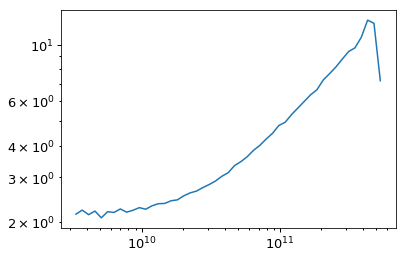

In [5]:
fig, ax = plt.subplots(1, 1)
yscale = ax.set_yscale('log')
__=ax.loglog()
__=ax.plot(10**logsm_table_sdss, median_size_sdss)

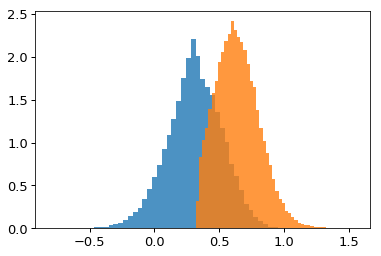

In [6]:
mask = (sdss['sm'] > 10) & (sdss['sm'] < 10.5)
sample = sdss[mask]

fig, ax = plt.subplots(1, 1)

__=ax.hist(np.log10(sdss['r50_magr_kpc_meert15'][sdss['small']]), 
           normed=True, bins=50, alpha=0.8)
__=ax.hist(np.log10(sdss['r50_magr_kpc_meert15'][~sdss['small']]), 
           normed=True, bins=50, alpha=0.8)

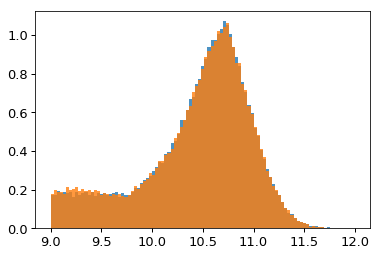

In [7]:
fig, ax = plt.subplots(1, 1)

sm_bins = np.linspace(9, 12, 100)

__=ax.hist(sdss['sm'][sdss['small']], bins=sm_bins, normed=True, alpha=0.8)
__=ax.hist(sdss['sm'][~sdss['small']], bins=sm_bins, normed=True, alpha=0.8)

In [8]:
from galsize_models.measurements.measure_sdss_clustering import save_wp_measurement, measure_wp
import os

repo_dirname = "/Users/aphearin/work/repositories/python/galsize_models"
output_subdirname = "galsize_models/measurements/data/two_point_functions"
output_dirname = os.path.join(repo_dirname, output_subdirname)


In [9]:
sm_low, sm_high = 9.75, 10.25
sm_mask = (sdss['sm'] > sm_low) & (sdss['sm'] < sm_high)
sm_sample = sdss[sm_mask]
sm_sample_small = sm_sample[sm_sample['small']]
sm_sample_large = sm_sample[~sm_sample['small']]

In [10]:
len(sm_sample_small), len(sm_sample_large)

(12567, 12586)

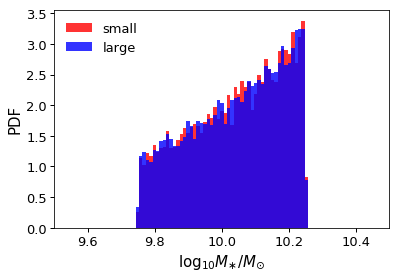

In [11]:
fig, ax = plt.subplots(1, 1)

sm_bins = np.linspace(9.5, 10.5, 100)

__=ax.hist(sm_sample_small['sm'], bins=sm_bins, normed=True, alpha=0.8, 
           label='small', color='red')
__=ax.hist(sm_sample_large['sm'], bins=sm_bins, normed=True, alpha=0.8, 
          label='large', color='blue')

xlabel = ax.set_xlabel(r'$\log_{10}M_{\ast}/M_{\odot}$')
ylabel = ax.set_ylabel(r'PDF')
xlim = ax.set_xlim(9.5, 10.5)
legend = ax.legend()

figname = 'sdss_mstar_distributions_size_split_9p75_to_10p25.pdf'
fig.savefig(figname, bbox_extra_artists=[xlabel, ylabel], bbox_inches='tight')


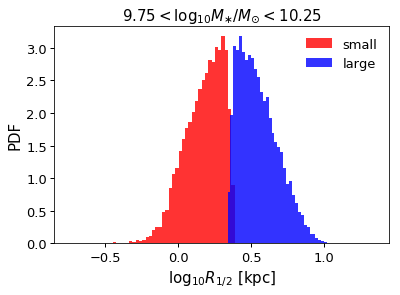

In [12]:
fig, ax = plt.subplots(1, 1)

__=ax.hist(np.log10(sm_sample_small['r50_magr_kpc_meert15']), 
           normed=True, bins=50, alpha=0.8, label='small', color='red')
__=ax.hist(np.log10(sm_sample_large['r50_magr_kpc_meert15']), 
           normed=True, bins=50, alpha=0.8, label='large', color='blue')

xlabel = ax.set_xlabel(r'$\log_{10}R_{1/2}$ $[{\rm kpc}]$')
ylabel = ax.set_ylabel(r'PDF')
title = ax.set_title(r'${9.75} < \log_{10}M_{\ast}/M_{\odot} < {10.25}$')
legend = ax.legend()

figname = 'sdss_rhalf_distributions_size_split_9p75_to_10p25.pdf'
fig.savefig(figname, bbox_extra_artists=[xlabel, ylabel], bbox_inches='tight')


In [15]:
from galsize_models.measurements.measure_sdss_clustering import measure_wp

rp_sm10p0, wp_sm10p0, wperr_sm10p0 = measure_wp(sm_sample, sm_low, sm_high, output_dirname)
rp_sm10p0_small, wp_sm10p0_small, wperr_sm10p0_small = measure_wp(sm_sample_small, sm_low, sm_high, output_dirname)
rp_sm10p0_large, wp_sm10p0_large, wperr_sm10p0_large = measure_wp(sm_sample_large, sm_low, sm_high, output_dirname)

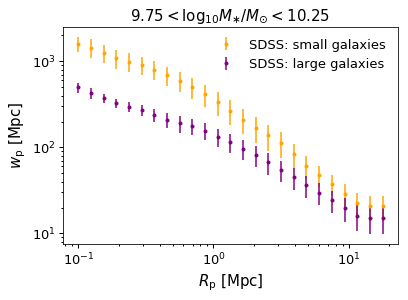

In [17]:
fig, ax = plt.subplots(1, 1)

__=ax.loglog()

__=ax.errorbar(rp_sm10p0_small, wp_sm10p0_small, wperr_sm10p0_small, 
               fmt='.', color='orange', label='SDSS: small galaxies')
__=ax.errorbar(rp_sm10p0_large, wp_sm10p0_large, wperr_sm10p0_large, 
               fmt='.', color='purple', label='SDSS: large galaxies')

xlabel = ax.set_xlabel(r'$R_{\rm p}$ $[{\rm Mpc}]$')
ylabel = ax.set_ylabel(r'$w_{\rm p}$ $[{\rm Mpc}]$')
title = ax.set_title(r'${9.75} < \log_{10}M_{\ast}/M_{\odot} < {10.25}$')
legend = ax.legend()

figname = 'sdss_size_dependent_clustering_9p75_to_10p25.pdf'
fig.savefig(figname, bbox_extra_artists=[xlabel, ylabel], bbox_inches='tight')


In [18]:
print(sdss.keys())

['ra', 'dec', 'z', 'bptclass', 'sm', 'sfr', 'specsfr', 'sm_fib', 'sfr_fib', 'specsfr_fib', 'withinr', 'eligiblehost', 'sm_complete', 'eligiblehost2', 'd4000', 'd4000_sub', 'd4000_n', 'd4000_n_sub', 'has_match', 'logM_mendel13', 'logMB_mendel13', 'logMD_mendel13', 'pps_mendel13', 'type_mendel13', 'deltaBD_mendel13', 'dr7_objID', 'has_meert15_match', 'r50_magr_kpc_meert15', 'Magr_tot_meert15', 'Magr_bulge_meert15', 'Magr_disk_meert15', 'gr_bulge_meert15', 'gr_disk_meert15', 'morph_type_T_meert15', 'gr_kcorr_meert15', 'bulge_to_total_rband_meert15', 'logsm_bell03_meert15', 'ssfr', 'median_size', 'small']


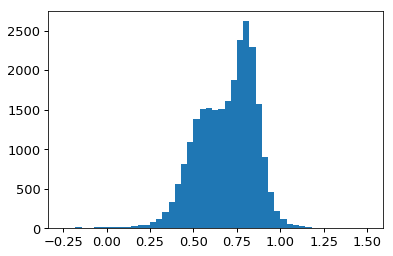

In [19]:
fig, ax = plt.subplots(1, 1)
gr_bins = np.linspace(-0.25, 1.5, 50)

__=ax.hist(sm_sample['gr_kcorr_meert15'], bins=gr_bins)

In [20]:
red_mask = sm_sample['gr_kcorr_meert15'] > 0.65
red_sm_sample = sm_sample[red_mask]

logsm_bin_edges_red_sm = np.linspace(9.75, 10.25, 10)

median_size_red_sm, __, __ = binned_statistic(red_sm_sample['sm'], 
                                            red_sm_sample['r50_magr_kpc_meert15'], 
                                            bins=logsm_bin_edges_red_sm, statistic='median')

logsm_table_red_sm = 0.5*(logsm_bin_edges_red_sm[:-1] + logsm_bin_edges_red_sm[1:])

red_sm_sample['median_size_red'] = np.interp(red_sm_sample['sm'], 
                        logsm_table_red_sm, median_size_red_sm)
red_sm_sample['small_red'] = red_sm_sample['r50_magr_kpc_meert15'] < red_sm_sample['median_size_red']

red_sm_sample_small = red_sm_sample[red_sm_sample['small_red']]
red_sm_sample_large = red_sm_sample[~red_sm_sample['small_red']]

In [21]:
rp_sm10p0_red, wp_sm10p0_red, wperr_sm10p0_red = measure_wp(red_sm_sample, sm_low, sm_high, output_dirname)
rp_sm10p0_red_small, wp_sm10p0_red_small, wperr_sm10p0_red_small = measure_wp(red_sm_sample_small, sm_low, sm_high, output_dirname)
rp_sm10p0_red_large, wp_sm10p0_red_large, wperr_sm10p0_red_large = measure_wp(red_sm_sample_large, sm_low, sm_high, output_dirname)

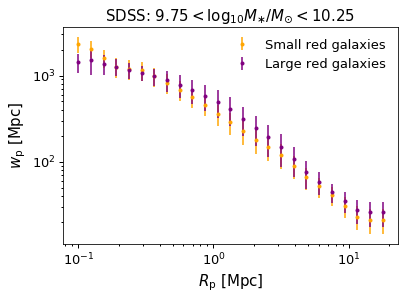

In [42]:
fig, ax = plt.subplots(1, 1)

__=ax.loglog()

__=ax.errorbar(rp_sm10p0_red_small, wp_sm10p0_red_small, wperr_sm10p0_red_small, 
               fmt='.', color='orange', label='Small red galaxies')
__=ax.errorbar(rp_sm10p0_red_large, wp_sm10p0_red_large, wperr_sm10p0_red_large, 
               fmt='.', color='purple', label='Large red galaxies')

xlabel = ax.set_xlabel(r'$R_{\rm p}$ $[{\rm Mpc}]$')
ylabel = ax.set_ylabel(r'$w_{\rm p}$ $[{\rm Mpc}]$')
title = ax.set_title(r'SDSS: ${9.75} < \log_{10}M_{\ast}/M_{\odot} < {10.25}$')
legend = ax.legend()

figname = 'red_sdss_size_dependent_clustering_9p75_to_10p25.pdf'
fig.savefig(figname, bbox_extra_artists=[xlabel, ylabel], bbox_inches='tight')


In [24]:
print(sdss.keys())

['ra', 'dec', 'z', 'bptclass', 'sm', 'sfr', 'specsfr', 'sm_fib', 'sfr_fib', 'specsfr_fib', 'withinr', 'eligiblehost', 'sm_complete', 'eligiblehost2', 'd4000', 'd4000_sub', 'd4000_n', 'd4000_n_sub', 'has_match', 'logM_mendel13', 'logMB_mendel13', 'logMD_mendel13', 'pps_mendel13', 'type_mendel13', 'deltaBD_mendel13', 'dr7_objID', 'has_meert15_match', 'r50_magr_kpc_meert15', 'Magr_tot_meert15', 'Magr_bulge_meert15', 'Magr_disk_meert15', 'gr_bulge_meert15', 'gr_disk_meert15', 'morph_type_T_meert15', 'gr_kcorr_meert15', 'bulge_to_total_rband_meert15', 'logsm_bell03_meert15', 'ssfr', 'median_size', 'small']


In [25]:
blue_mask = sm_sample['gr_kcorr_meert15'] < 0.65
blue_sm_sample = sm_sample[blue_mask]

logsm_bin_edges_blue_sm = np.linspace(9.75, 10.25, 10)

median_size_blue_sm, __, __ = binned_statistic(blue_sm_sample['sm'], 
                                            blue_sm_sample['r50_magr_kpc_meert15'], 
                                            bins=logsm_bin_edges_blue_sm, statistic='median')

logsm_table_blue_sm = 0.5*(logsm_bin_edges_blue_sm[:-1] + logsm_bin_edges_blue_sm[1:])

blue_sm_sample['median_size_blue'] = np.interp(blue_sm_sample['sm'], 
                        logsm_table_blue_sm, median_size_blue_sm)
blue_sm_sample['small_blue'] = blue_sm_sample['r50_magr_kpc_meert15'] < blue_sm_sample['median_size_blue']

blue_sm_sample_small = blue_sm_sample[blue_sm_sample['small_blue']]
blue_sm_sample_large = blue_sm_sample[~blue_sm_sample['small_blue']]

In [26]:
rp_sm10p0_blue, wp_sm10p0_blue, wperr_sm10p0_blue = measure_wp(blue_sm_sample, sm_low, sm_high, output_dirname)
rp_sm10p0_blue_small, wp_sm10p0_blue_small, wperr_sm10p0_blue_small = measure_wp(blue_sm_sample_small, sm_low, sm_high, output_dirname)
rp_sm10p0_blue_large, wp_sm10p0_blue_large, wperr_sm10p0_blue_large = measure_wp(blue_sm_sample_large, sm_low, sm_high, output_dirname)

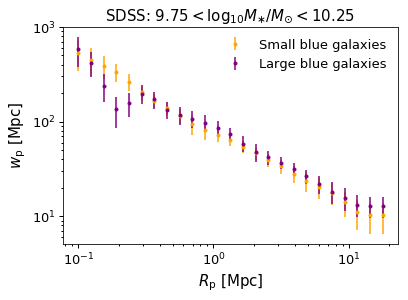

In [41]:
fig, ax = plt.subplots(1, 1)

__=ax.loglog()

__=ax.errorbar(rp_sm10p0_blue_small, wp_sm10p0_blue_small, wperr_sm10p0_blue_small, 
               fmt='.', color='orange', label='Small blue galaxies')
__=ax.errorbar(rp_sm10p0_blue_large, wp_sm10p0_blue_large, wperr_sm10p0_blue_large, 
               fmt='.', color='purple', label='Large blue galaxies')

xlabel = ax.set_xlabel(r'$R_{\rm p}$ $[{\rm Mpc}]$')
ylabel = ax.set_ylabel(r'$w_{\rm p}$ $[{\rm Mpc}]$')
title = ax.set_title(r'SDSS: ${9.75} < \log_{10}M_{\ast}/M_{\odot} < {10.25}$')
legend = ax.legend()

figname = 'blue_sdss_size_dependent_clustering_9p75_to_10p25.pdf'
fig.savefig(figname, bbox_extra_artists=[xlabel, ylabel], bbox_inches='tight')


In [28]:
print(sdss.keys())

['ra', 'dec', 'z', 'bptclass', 'sm', 'sfr', 'specsfr', 'sm_fib', 'sfr_fib', 'specsfr_fib', 'withinr', 'eligiblehost', 'sm_complete', 'eligiblehost2', 'd4000', 'd4000_sub', 'd4000_n', 'd4000_n_sub', 'has_match', 'logM_mendel13', 'logMB_mendel13', 'logMD_mendel13', 'pps_mendel13', 'type_mendel13', 'deltaBD_mendel13', 'dr7_objID', 'has_meert15_match', 'r50_magr_kpc_meert15', 'Magr_tot_meert15', 'Magr_bulge_meert15', 'Magr_disk_meert15', 'gr_bulge_meert15', 'gr_disk_meert15', 'morph_type_T_meert15', 'gr_kcorr_meert15', 'bulge_to_total_rband_meert15', 'logsm_bell03_meert15', 'ssfr', 'median_size', 'small']


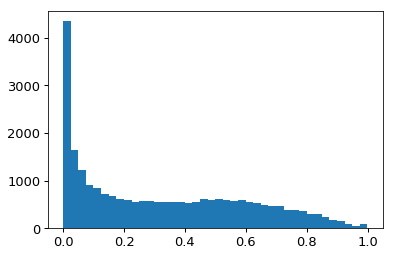

In [29]:
fig, ax = plt.subplots(1, 1)

__=ax.hist(sm_sample['bulge_to_total_rband_meert15'], bins=40)

In [30]:
disk_mask = sm_sample['bulge_to_total_rband_meert15'] < 0.5
disk_sm_sample = sm_sample[disk_mask]

logsm_bin_edges_disk_sm = np.linspace(9.75, 10.25, 10)

median_size_disk_sm, __, __ = binned_statistic(disk_sm_sample['sm'], 
                                            disk_sm_sample['r50_magr_kpc_meert15'], 
                                            bins=logsm_bin_edges_disk_sm, statistic='median')

logsm_table_disk_sm = 0.5*(logsm_bin_edges_disk_sm[:-1] + logsm_bin_edges_disk_sm[1:])

disk_sm_sample['median_size_disk'] = np.interp(disk_sm_sample['sm'], 
                        logsm_table_disk_sm, median_size_disk_sm)
disk_sm_sample['small_disk'] = disk_sm_sample['r50_magr_kpc_meert15'] < disk_sm_sample['median_size_disk']

disk_sm_sample_small = disk_sm_sample[disk_sm_sample['small_disk']]
disk_sm_sample_large = disk_sm_sample[~disk_sm_sample['small_disk']]

In [31]:
rp_sm10p0_disk, wp_sm10p0_disk, wperr_sm10p0_disk = measure_wp(disk_sm_sample, sm_low, sm_high, output_dirname)
rp_sm10p0_disk_small, wp_sm10p0_disk_small, wperr_sm10p0_disk_small = measure_wp(disk_sm_sample_small, sm_low, sm_high, output_dirname)
rp_sm10p0_disk_large, wp_sm10p0_disk_large, wperr_sm10p0_disk_large = measure_wp(disk_sm_sample_large, sm_low, sm_high, output_dirname)

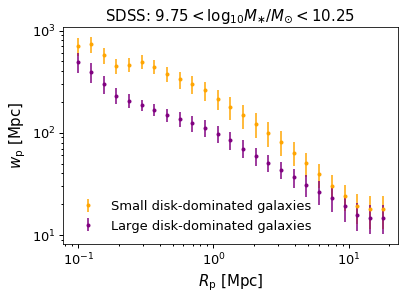

In [43]:
fig, ax = plt.subplots(1, 1)

__=ax.loglog()

__=ax.errorbar(rp_sm10p0_disk_small, wp_sm10p0_disk_small, wperr_sm10p0_disk_small, 
               fmt='.', color='orange', label='Small disk-dominated galaxies')
__=ax.errorbar(rp_sm10p0_disk_large, wp_sm10p0_disk_large, wperr_sm10p0_disk_large, 
               fmt='.', color='purple', label='Large disk-dominated galaxies')

xlabel = ax.set_xlabel(r'$R_{\rm p}$ $[{\rm Mpc}]$')
ylabel = ax.set_ylabel(r'$w_{\rm p}$ $[{\rm Mpc}]$')
title = ax.set_title(r'SDSS: ${9.75} < \log_{10}M_{\ast}/M_{\odot} < {10.25}$')
legend = ax.legend()

figname = 'disk_sdss_size_dependent_clustering_9p75_to_10p25.pdf'
fig.savefig(figname, bbox_extra_artists=[xlabel, ylabel], bbox_inches='tight')


In [33]:
bulge_mask = sm_sample['bulge_to_total_rband_meert15'] > 0.5
bulge_sm_sample = sm_sample[bulge_mask]

logsm_bin_edges_bulge_sm = np.linspace(9.75, 10.25, 10)

median_size_bulge_sm, __, __ = binned_statistic(bulge_sm_sample['sm'], 
                                            bulge_sm_sample['r50_magr_kpc_meert15'], 
                                            bins=logsm_bin_edges_bulge_sm, statistic='median')

logsm_table_bulge_sm = 0.5*(logsm_bin_edges_bulge_sm[:-1] + logsm_bin_edges_bulge_sm[1:])

bulge_sm_sample['median_size_bulge'] = np.interp(bulge_sm_sample['sm'], 
                        logsm_table_bulge_sm, median_size_bulge_sm)
bulge_sm_sample['small_bulge'] = bulge_sm_sample['r50_magr_kpc_meert15'] < bulge_sm_sample['median_size_bulge']

bulge_sm_sample_small = bulge_sm_sample[bulge_sm_sample['small_bulge']]
bulge_sm_sample_large = bulge_sm_sample[~bulge_sm_sample['small_bulge']]

In [34]:
rp_sm10p0_bulge, wp_sm10p0_bulge, wperr_sm10p0_bulge = measure_wp(bulge_sm_sample, sm_low, sm_high, output_dirname)
rp_sm10p0_bulge_small, wp_sm10p0_bulge_small, wperr_sm10p0_bulge_small = measure_wp(bulge_sm_sample_small, sm_low, sm_high, output_dirname)
rp_sm10p0_bulge_large, wp_sm10p0_bulge_large, wperr_sm10p0_bulge_large = measure_wp(bulge_sm_sample_large, sm_low, sm_high, output_dirname)

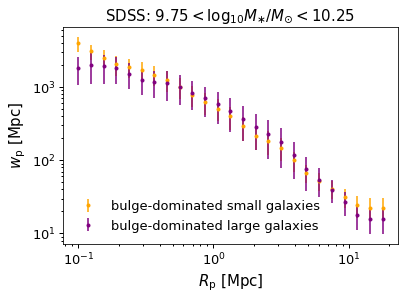

In [38]:
fig, ax = plt.subplots(1, 1)

__=ax.loglog()

__=ax.errorbar(rp_sm10p0_bulge_small, wp_sm10p0_bulge_small, wperr_sm10p0_bulge_small, 
               fmt='.', color='orange', label='Small bulge-dominated galaxies')
__=ax.errorbar(rp_sm10p0_bulge_large, wp_sm10p0_bulge_large, wperr_sm10p0_bulge_large, 
               fmt='.', color='purple', label='Large bulge-dominated galaxies')

xlabel = ax.set_xlabel(r'$R_{\rm p}$ $[{\rm Mpc}]$')
ylabel = ax.set_ylabel(r'$w_{\rm p}$ $[{\rm Mpc}]$')
title = ax.set_title(r'SDSS: ${9.75} < \log_{10}M_{\ast}/M_{\odot} < {10.25}$')
legend = ax.legend()

figname = 'bulge_sdss_size_dependent_clustering_9p75_to_10p25.pdf'
fig.savefig(figname, bbox_extra_artists=[xlabel, ylabel], bbox_inches='tight')
